In [1]:
import os
import re
import glob
import scipy
import collections

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

% matplotlib inline

from __future__ import division

matplotlib.rc('axes', labelsize = 6)
matplotlib.rc('xtick', labelsize = 5) 
matplotlib.rc('ytick', labelsize = 5)

In [2]:
class OP_Data:
    
    def __init__(self, icR, ilR):
        self.icR = int(icR)
        self.ilR = int(ilR)
        self.nRs = 0
        self.feats = collections.defaultdict(list)
        
    def describe(self):
        print "icR: " + repr(self.icR) + " ilR: " + repr(self.ilR) + " nRs: " + repr(self.nRs)
        
    def add_rep_feats(self, nRep, df):
        self.nRs += 1
        if nRep == self.nRs:
            self.feats[self.nRs] = df.as_matrix()
        else:
            print "Error: Replicate data entered out of order!"
    
    def get_rep_feat(self, nRep):
        return self.feats[nRep]
    
    def get_sim_params(self):
        return (self.icR, self.ilR)
    
    def get_nreps(self):
        return self.nRs

In [3]:
OP_Data_List = list()

icR = 3
ilR = 3
nRep = 1
OP_Data_List.append(OP_Data(icR, ilR))

df = pd.read_csv("data_long_3d_icR_3_ilR_3_order_params.csv")
OP_Data_List[-1].add_rep_feats(nRep, df)     

In [4]:
def extract_feats(OP_List, icR, ilR, nRep):
    for OP_Data in OP_List:
        if (icR, ilR) == OP_Data.get_sim_params():
            feat_data = np.transpose(OP_Data.get_rep_feat(nRep))
            
            time = range(len(feat_data[0]))
            pol = feat_data[0]
            ang_mmt = feat_data[1]
            abs_ang_mmt = feat_data[2]
            mean_nnd = feat_data[3]
            i_s = feat_data[4]
            
            return (time, pol, ang_mmt, abs_ang_mmt, mean_nnd, i_s)

In [5]:
def plot_feats(time, pol, ang_mmt, abs_ang_mmt, mean_nnd, i_s):
    plt.figure(figsize=(4,2), dpi = 300)
    plt.plot(time, pol, 'b-', label="Polarization", linewidth=0.8)
    plt.plot(time, ang_mmt, 'g-', label="Angular Momentum", linewidth=0.8)
    plt.plot(time, abs_ang_mmt, 'r-', label="Absolute Angular Momentum", linewidth=0.8)
    plt.plot(time, mean_nnd, 'k-', label="Mean Nearest Neighbor Distance", linewidth=0.8)
    plt.plot(time, i_s, 'k-', label="I_s", linewidth=0.8)
    plt.legend(loc=4, prop={'size': 4})
    plt.tight_layout()
    plt.xlabel("Time")
    plt.ylabel("Order Parameters")
    plt.show()

In [6]:
def plot_all_reps(OP_Data_List, icR, ilR):
    plt.figure(figsize=(4,2), dpi = 300)
    for OP_Data in OP_Data_List:
        if (icR, ilR) == OP_Data.get_sim_params():
            nReps = OP_Data.get_nreps()
            for rep in range(1, nReps+1):
                feat_data = np.transpose(OP_Data.get_rep_feat(rep))
                t_vals = np.asarray(range(len(feat_data[0]))) * 0.05
                l0, = plt.plot(t_vals, feat_data[0], 'b-', label="Polarization", 
                               linewidth=0.75, linestyle='-', alpha=1.0)
                l1, = plt.plot(t_vals, feat_data[1], 'g-', label="Angular Momentum", 
                               linewidth=0.75, linestyle='-.', alpha=1.0)
                l2, = plt.plot(t_vals, feat_data[2], 'r-', label="Angular Momentum", 
                               linewidth=0.75, linestyle='--', alpha=1.0)
                l3, = plt.plot(t_vals, feat_data[3], 'k-', label="Angular Momentum", 
                               linewidth=0.75, linestyle=':', alpha=1.0)
                #l4, = plt.plot(t_vals, feat_data[4], 'c-', label="I_s", 
                #               linewidth=0.75, linestyle='-', alpha=1.0)
    lgd_labels = ["Polarization", "Angular Momentum", "Abs. Angular Momentum", "Mean Neighbor Distance", "I_s"]
    #plt.legend([l0, l1, l2, l3, l4], lgd_labels, loc=4, prop={'size': 8}, framealpha=1.0)
    plt.tight_layout()
    plt.xlabel("Time")
    plt.ylabel("Order Parameters")
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig("3d_long_cool_double_ring_order_params_inset_log.png")
    plt.show()

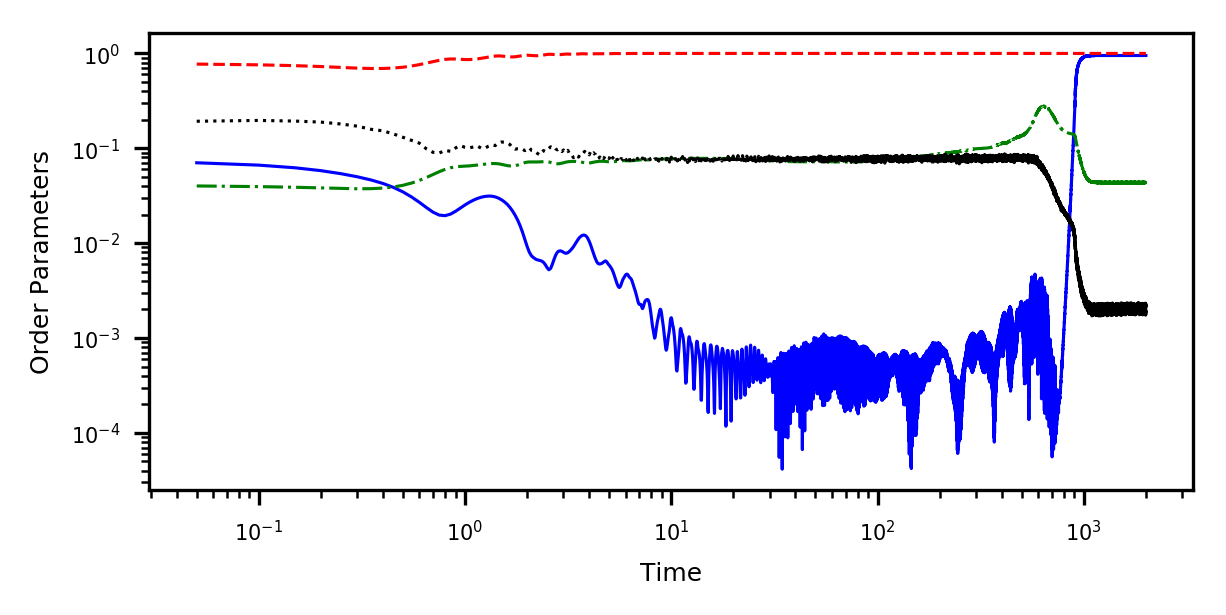

In [7]:
plot_all_reps(OP_Data_List, 3, 3)